# Projeto Final

## This project will take data from covid-19, from a public api, and show the evolution in Ecuador, through a graph, from the first day to the present day.

In [1]:
# Importando a biblioteca 'requests' para fazer a requisição dos dados
import requests as r

In [2]:
# Definindo a url para acessar os dados
url = 'https://api.covid19api.com/dayone/country/ecuador'
resp = r.get(url)

In [3]:
# Olhando o status da requisição
resp.status_code

200

In [4]:
# Guardando os dados que foram retornados pela API
raw_data = resp.json()

In [5]:
# Olhando os dados
raw_data[0]

{'Active': 6,
 'City': '',
 'CityCode': '',
 'Confirmed': 6,
 'Country': 'Ecuador',
 'CountryCode': 'EC',
 'Date': '2020-03-01T00:00:00Z',
 'Deaths': 0,
 'ID': 'a63c3c63-06c3-4023-9cf8-ad07cbefc307',
 'Lat': '-1.83',
 'Lon': '-78.18',
 'Province': '',
 'Recovered': 0}

In [6]:
# Filtrando dados
final_data = []
for obs in raw_data:
  final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [7]:
# Verificando os dados filtrados
final_data.insert(0, ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])
#final_data

In [8]:
# Criando constantes para manipular os dados
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [9]:
# Filtrando a data
for i in range(1, len(final_data)):
  final_data[i][DATA] = final_data[i][DATA][:10]

In [10]:
#final_data

In [11]:
# Importando a biblioteca 'datetime' para transformar a informação em data
import datetime as dt

In [12]:
# Exemplo do uso da bilbioteca 'datatime'
print(dt.time(12, 6, 21, 7), 'Hora:minuto:segundo.microsegundo')
print('------------')
print(dt.date(2021, 7, 13), 'Ano-mês-dia')
print('------------')
print(dt.datetime(2021, 7, 13, 12, 6, 21, 7), 'Ano-mês-dia Hora:minuto:segundo.microsegundo')

12:06:21.000007 Hora:minuto:segundo.microsegundo
------------
2021-07-13 Ano-mês-dia
------------
2021-07-13 12:06:21.000007 Ano-mês-dia Hora:minuto:segundo.microsegundo


In [13]:
# Exemplo do uso da bilbioteca 'datatime'
natal = dt.date(2020, 12, 25)
reveillon = dt.date(2021, 1,1 )

print(reveillon - natal)
print((reveillon - natal).days)
print((reveillon - natal).seconds)
print((reveillon - natal).microseconds)

7 days, 0:00:00
7
0
0


In [14]:
# Importanto a biblioteca csv para guardar os dados no formato csv
import csv

In [15]:
# Guardando o arquivo .csv com os dados
with open('brasil_covid.csv', 'w') as file:
  writer = csv.writer(file)
  writer.writerows(final_data)

In [16]:
# Transformando uma string representativa de uma data para um data de verdade
for i in range(1, len(final_data)):
  final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], '%Y-%m-%d') # o strptime faz o parsing de uma string para um valor data

In [17]:
#final_data

## Criando funções helper

In [18]:
# Criando funções helper
def get_datasets(y, labels):
  if type(y[0]) == list:
    datasets = []
    for i in range(len(y)):
      datasets.append({
          'labels': labels[i],
          'data': y[i]
      })
    return datasets
  else:
    return [
        {
            'label': labels[0],
            'data': y
        }
    ]

In [19]:
def set_title(title=''):
  if title != '':
    display = 'true'
  else:
    display = 'false'
  return {
      'title': title,
      'display': display
  }

In [20]:
# Função que cria o dicionário que representa o gráfico
def create_chart(x, y, labels, kind='bar', title=''):
  datasets = get_datasets(y, labels)
  options = set_title(title)

  chart = {
      'type': kind,
      'data': {
          'labels': x,
          'datasets': datasets
      },
      'options': options
  }

  return chart

In [21]:
# Criando uma função que vai fazer uma requisição na API utilizando o dicionário
def get_api_chart(chart):
  url_base = 'https://quickchart.io/chart'
  resp = r.get(f'{url_base}?c={str(chart)}')
  return resp.content

In [22]:
# Criando função para salvar a imagen
def save_image(path, content):
  with open(path, 'wb') as image:
    image.write(content)

In [23]:
# Importando bibliotecas para mostrar a imagen
from PIL import Image
from IPython.display import display

In [24]:
# Criando função para mostrar a imagen
def display_image(path):
  img_pil = Image.open(path)
  display(img_pil)

## Obtendo os dados para fazer o gráfico

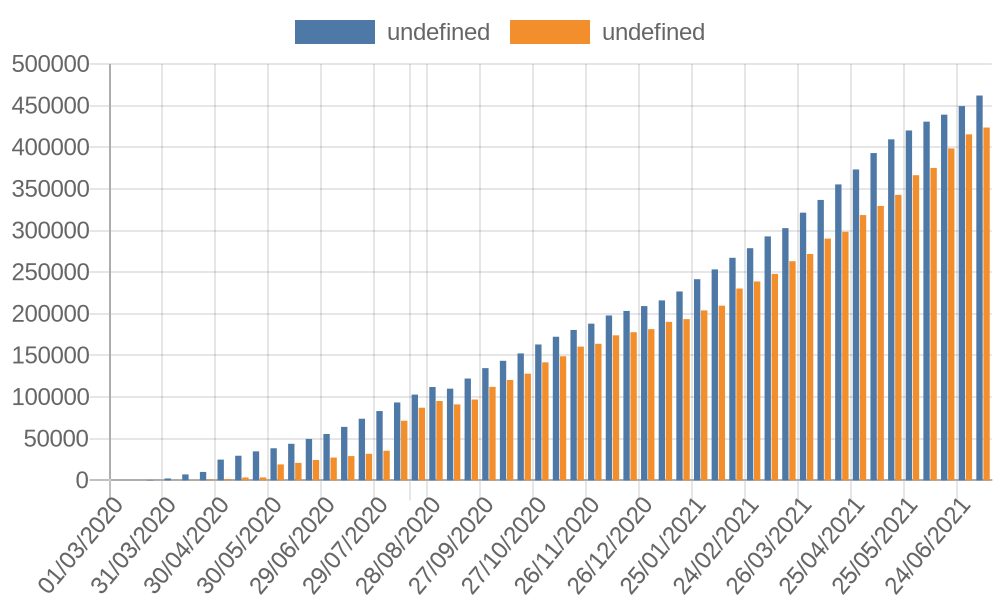

In [25]:
# Obtendo os dados e mostrando o gráfico
y_data_1 = []
for obs in final_data[1::10]:
  y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs in final_data[1::10]:
  y_data_2.append(obs[RECUPERADOS])

#labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::10]:
  x.append(obs[DATA].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], ['Confirmados', 'Recuperados'], title='Gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')